In [1]:
import pandas as pd

# Nama file CSV
csv_filename = "scholar_titles_links.csv"

# Membaca file CSV
try:
    df = pd.read_csv(csv_filename, encoding="utf-8")
    print(df.head())  # Menampilkan 5 baris pertama
except FileNotFoundError:
    print(f"❌ File '{csv_filename}' tidak ditemukan.")
except Exception as e:
    print(f"⚠️ Terjadi kesalahan: {e}")


                                               Title  \
0  I enjoy writing and playing, do you?: a person...   
1  Teaching students about conversational ai usin...   
2  Towards an online empathetic chatbot with emot...   
3  Compeer: A generative conversational agent for...   
4  Conversational AI-Chatbot Architectures and Ev...   

                                                Link  Year  \
0  https://ieeexplore.ieee.org/abstract/document/...  2022   
1  https://ieeexplore.ieee.org/abstract/document/...  2021   
2  https://dl.acm.org/doi/abs/10.1145/3404835.346...  2021   
3  https://dl.acm.org/doi/abs/10.1145/3654777.367...  2024   
4  https://sydneyacademics.com/index.php/ajmlra/a...  2021   

                                            Abstract  
0  conversational agent to communicate with its u...  
1  CONVO to train ML models and create conversati...  
2  To answer these sub-questions, we develop an E...  
3  generative agents to improve people’s mental h...  
4  studies, to 

Lowercasing: Mengubah teks menjadi huruf kecil.

Removing Punctuation & Special Characters: Menghapus tanda baca.

Removing Numbers: Menghapus angka dari teks.

Tokenization: Memisahkan teks menjadi kata-kata.

Stopword Removal: Menghapus kata-kata umum yang tidak memiliki makna penting.

Lemmatization: Mengubah kata menjadi bentuk dasarnya.

In [2]:
import nltk

# Download the required resources again
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

print("✅ All necessary NLTK resources have been downloaded.")

✅ All necessary NLTK resources have been downloaded.


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Unity_Comp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Unity_Comp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Unity_Comp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Unity_Comp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Inisialisasi Lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """
    Fungsi untuk membersihkan teks (hanya untuk kolom Title dan Abstract).
    """
    if not isinstance(text, str):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Remove HTML tags
    text = re.sub(r"<.*?>", "", text)

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove numbers
    text = re.sub(r"\d+", "", text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join back into a string
    cleaned_text = " ".join(tokens)

    return cleaned_text





In [7]:
try:
    # Bersihkan hanya kolom "Title"
    df["Title"] = df["Title"].apply(clean_text)

    # Simpan kembali hanya kolom Title ke CSV
    cleaned_csv_filename = "cleaned_titles.csv"
    df[["Title"]].to_csv(cleaned_csv_filename, index=False, encoding="utf-8")

    print(f"\n✅ Preprocessing selesai! Data disimpan ke '{cleaned_csv_filename}'.")
    df = pd.read_csv(cleaned_csv_filename, encoding="utf-8")
    print(df.head())  # Tampilkan beberapa hasil pertama

except FileNotFoundError:
    print(f"❌ File '{cleaned_csv_filename}' tidak ditemukan.")
except Exception as e:
    print(f"⚠️ Terjadi kesalahan: {e}")



✅ Preprocessing selesai! Data disimpan ke 'cleaned_titles.csv'.
                                               Title
0  enjoy writing playing personalized emotion gro...
1  teaching student conversational ai using convo...
2    towards online empathetic chatbot emotion cause
3  compeer generative conversational agent proact...
4  conversational aichatbot architecture evaluati...


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Unity_Comp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Unity_Comp\AppData\Local\Temp\ipykernel_28132\1553550343.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")
c:\Users\Unity_Comp\anaconda3\envs\mypython3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


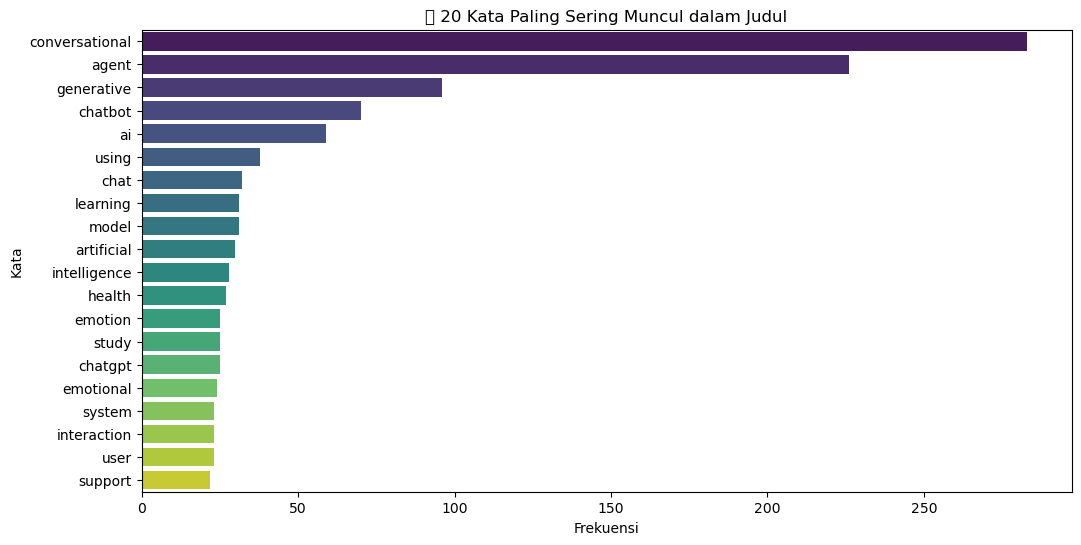

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist

# Download tokenizer jika belum ada
nltk.download("punkt")

# 📂 Baca file CSV
csv_filename = "cleaned_titles.csv"

try:
    df = pd.read_csv(csv_filename, encoding="utf-8")

    # Pastikan kolom "Title" ada dalam dataset
    if "Title" not in df.columns:
        raise ValueError("❌ Kolom 'Title' tidak ditemukan dalam dataset.")

    # Gabungkan semua teks di kolom "Title"
    combined_text = " ".join(df["Title"].astype(str))

    # Tokenisasi teks (memisahkan kata-kata)
    words = nltk.word_tokenize(combined_text)

    # Hitung frekuensi kata
    freq_dist = FreqDist(words)

    # Ambil 20 kata paling sering muncul
    most_common_words = freq_dist.most_common(20)
    words, counts = zip(*most_common_words)

    # Visualisasi dengan seaborn
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.xlabel("Frekuensi")
    plt.ylabel("Kata")
    plt.title("📊 20 Kata Paling Sering Muncul dalam Judul")
    plt.show()

except FileNotFoundError:
    print(f"❌ File '{csv_filename}' tidak ditemukan.")
except Exception as e:
    print(f"⚠️ Terjadi kesalahan: {e}")


In [ ]:
import nltk
import pandas as pd
from nltk import word_tokenize, pos_tag, ne_chunk

# Unduh resource yang dibutuhkan jika belum tersedia
nltk.download("punkt")
nltk.download("maxent_ne_chunker")
nltk.download("words")
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

# 📂 Baca file CSV
csv_filename = "cleaned_titles.csv"

try:
    df = pd.read_csv(csv_filename, encoding="utf-8")

    # Pastikan kolom "Title" ada
    if "Title" not in df.columns:
        raise ValueError("Kolom 'Title' tidak ditemukan dalam CSV!")

    # 🔍 Proses Named Entity Recognition (NER)
    entities_list = []

    for title in df["Title"].astype(str):
        tokens = word_tokenize(title)  # Tokenisasi
        pos_tags = pos_tag(tokens)  # Part-of-Speech tagging
        ner_tree = ne_chunk(pos_tags)  # Named Entity Recognition
        entities = [(chunk[0], chunk.label()) for chunk in ner_tree if hasattr(chunk, 'label')]
        entities_list.append(entities)

    # Tambahkan hasil NER ke dataframe
    df["Named_Entities"] = entities_list

    # 📌 Simpan hasil ke file CSV baru
    ner_output_filename = "ner_output_nltk.csv"
    df.to_csv(ner_output_filename, index=False, encoding="utf-8")

    print(f"\n✅ Named Entity Recognition selesai! Hasil disimpan di '{ner_output_filename}'.")
    print(df[["Title", "Named_Entities"]].head())

except FileNotFoundError:
    print(f"❌ File '{csv_filename}' tidak ditemukan.")
except Exception as e:
    print(f"⚠️ Terjadi kesalahan: {e}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Unity_Comp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Unity_Comp\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Unity_Comp\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Unity_Comp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\Unity_Comp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker_tab.zip.



✅ Named Entity Recognition selesai! Hasil disimpan di 'ner_output_nltk.csv'.
                                               Title Named_Entities
0  enjoy writing playing personalized emotion gro...             []
1  teaching student conversational ai using convo...             []
2    towards online empathetic chatbot emotion cause             []
3  compeer generative conversational agent proact...             []
4  conversational aichatbot architecture evaluati...             []


In [ ]:
import pandas as pd
from ast import literal_eval
from wordcloud import WordCloud

ner_output_filename = "ner_output_nltk.csv"

df = pd.read_csv(ner_output_filename, encoding="utf-8")

# 🛠 Konversi string menjadi list (karena data dalam kolom Named_Entities kemungkinan tersimpan sebagai string)
df["Named_Entities"] = df["Named_Entities"].fillna("[]").apply(literal_eval)

# 🔍 Cek jumlah array kosong
empty_arrays_count = df["Named_Entities"].apply(lambda x: len(x) == 0).sum()

# 🔍 Cek total baris dalam Named_Entities
total_rows = len(df)

# 🔍 Tampilkan hasil
print(f"Total baris dalam Named_Entities: {total_rows}")
print(f"Jumlah baris dengan array kosong di Named_Entities: {empty_arrays_count}")


if total_rows == empty_arrays_count:
    print("\n semua data dalam Named_Entities bernilai kosong, atau tidak ada entitas khusus yang ditemukan")
    
if empty_arrays_count > 0:
    print("\n⚠️ Ada baris yang memiliki Named_Entities kosong!")
else:
    print("\n✅ Semua baris dalam Named_Entities memiliki nilai.")


Total baris dalam Named_Entities: 414
Jumlah baris dengan array kosong di Named_Entities: 414

⚠️ Ada baris yang memiliki Named_Entities kosong!


TF-IDF


✅ Proses TF-IDF selesai! Hasil disimpan di 'tfidf_output.csv'.
                                               Title  ability  abstract  \
0  enjoy writing playing personalized emotion gro...      0.0       0.0   
1  teaching student conversational ai using convo...      0.0       0.0   
2    towards online empathetic chatbot emotion cause      0.0       0.0   
3  compeer generative conversational agent proact...      0.0       0.0   
4  conversational aichatbot architecture evaluati...      0.0       0.0   

   abuse  academic  acceleration  acceptability  acceptance  accounting  \
0    0.0       0.0           0.0            0.0         0.0         0.0   
1    0.0       0.0           0.0            0.0         0.0         0.0   
2    0.0       0.0           0.0            0.0         0.0         0.0   
3    0.0       0.0           0.0            0.0         0.0         0.0   
4    0.0       0.0           0.0            0.0         0.0         0.0   

   accuracy  ...  worker  workplac

C:\Users\Unity_Comp\AppData\Local\Temp\ipykernel_28600\3349366043.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_mean.values, y=tfidf_mean.index, palette="viridis")


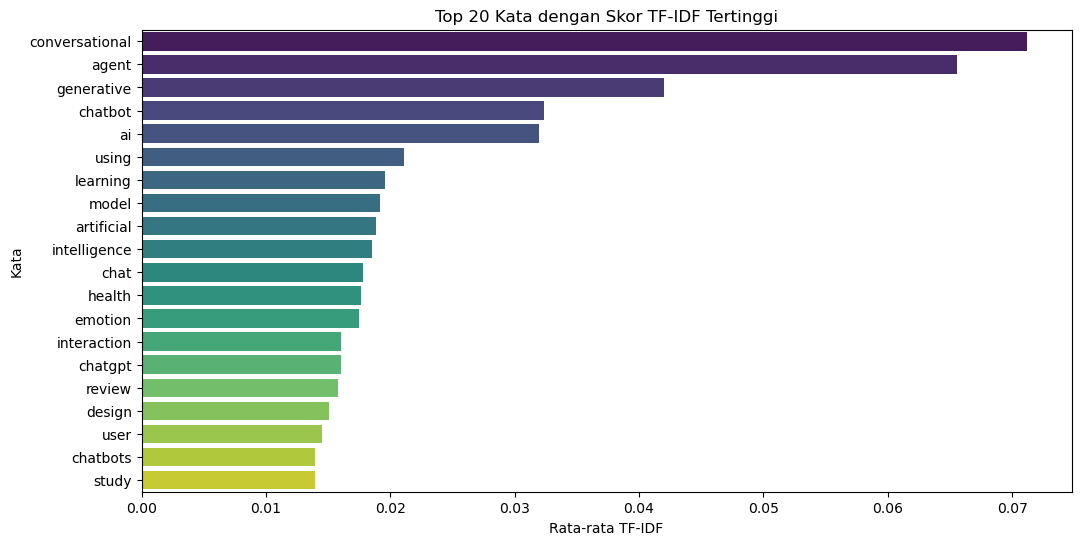

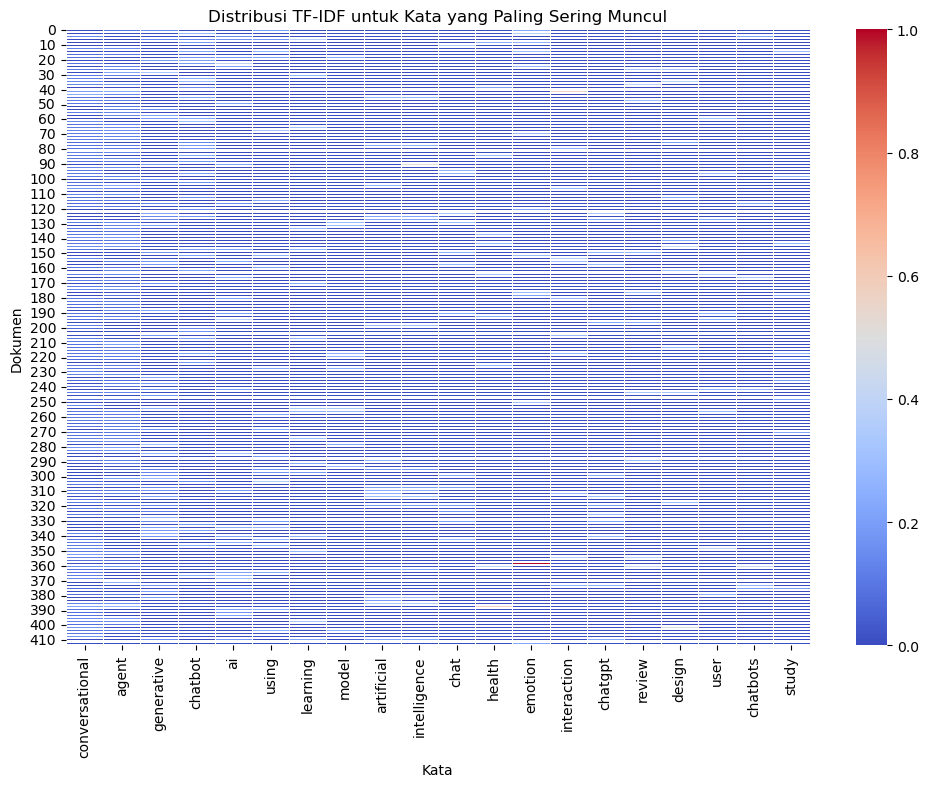

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# 📂 Baca file CSV
csv_filename = "cleaned_titles.csv"

try:
    df = pd.read_csv(csv_filename, encoding="utf-8")

    # Pastikan kolom "Title" ada
    if "Title" not in df.columns:
        raise ValueError("Kolom 'Title' tidak ditemukan dalam CSV!")

    # 🔍 Proses TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df["Title"].astype(str))
    feature_names = vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    # Tambahkan hasil TF-IDF ke dataframe
    df = pd.concat([df, tfidf_df], axis=1)

    # 📌 Simpan hasil ke file CSV baru
    tfidf_output_filename = "tfidf_output.csv"
    df.to_csv(tfidf_output_filename, index=False, encoding="utf-8")

    print(f"\n✅ Proses TF-IDF selesai! Hasil disimpan di '{tfidf_output_filename}'.")
    print(df.head())

    # Ambil rata-rata TF-IDF untuk setiap kata
    tfidf_mean = tfidf_df.mean().sort_values(ascending=False).head(20)  # Top 20 kata dengan TF-IDF tertinggi

    # Plot bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x=tfidf_mean.values, y=tfidf_mean.index, palette="viridis")
    plt.xlabel("Rata-rata TF-IDF")
    plt.ylabel("Kata")
    plt.title("Top 20 Kata dengan Skor TF-IDF Tertinggi")
    plt.show()

    # Hitung rata-rata TF-IDF untuk setiap kata
    top_words = tfidf_df.mean().sort_values(ascending=False).head(20).index

    # Ambil subset hanya dengan kata-kata paling penting
    tfidf_top = tfidf_df[top_words]

    # Plot heatmap dengan kata-kata yang paling sering muncul
    plt.figure(figsize=(12, 8))
    sns.heatmap(tfidf_top, cmap="coolwarm", linewidths=0.5)
    plt.xlabel("Kata")
    plt.ylabel("Dokumen")
    plt.title("Distribusi TF-IDF untuk Kata yang Paling Sering Muncul")
    plt.show()

except FileNotFoundError:
    print(f"❌ File '{csv_filename}' tidak ditemukan.")
except Exception as e:
    print(f"⚠️ Terjadi kesalahan: {e}")
